In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# DATA PREPROCESSING

In [2]:
df = pd.read_excel('score.xlsx',sheet_name='Sheet1')
df

,so_gio_hoc,diem
0,2,30
1,3,35
2,4,40
3,5,44
4,6,48
5,7,60
6,8,66
7,9,70
8,10,75


In [3]:
# Input
X = df.so_gio_hoc.values
print(X.shape)
X = X.reshape(len(X), 1)
X.shape

(9,)


(9, 1)

In [4]:
# Output
Y = df.diem.values
Y.shape

(9,)

In [5]:
# Chia X,Y thành 2 bộ training & testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.5, random_state=0)
X_train.shape, X_test.shape

((4, 1), (5, 1))

In [6]:
# SELECT
LR = lm.LinearRegression()
# TRAIN
LR.fit(X_train,Y_train)

LinearRegression()

In [7]:
# CHECK QUY TẮC: y = ax + b
a = LR.coef_
b = LR.intercept_
a, b

(array([6.0952381]), 16.476190476190467)

# Test

In [8]:
Yp_train = LR.predict(X_train)
print('PREDICTED TRAINING Y:',Yp_train)
print('ACTUAL TRAINING Y:   ',Y_train)
print('-'*100)

Yp_test = LR.predict(X_test)
print('PREDICTED TESTING Y:',Yp_test)
print('ACTUAL TESTING Y:   ',Y_test)

PREDICTED TRAINING Y: [65.23809524 46.95238095 28.66666667 59.14285714]
ACTUAL TRAINING Y:    [66 44 30 60]
----------------------------------------------------------------------------------------------------
PREDICTED TESTING Y: [71.33333333 40.85714286 34.76190476 53.04761905 77.42857143]
ACTUAL TESTING Y:    [70 40 35 48 75]


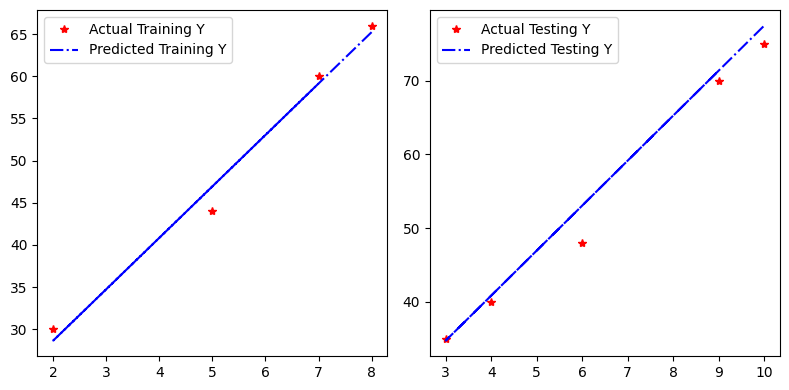

In [9]:
fig, (sub1, sub2) = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

sub1.plot(X_train,Y_train,'r*',label='Actual Training Y')
sub1.plot(X_train,Yp_train,'b-.',label='Predicted Training Y')
sub1.legend(loc=0)

sub2.plot(X_test,Y_test,'r*',label='Actual Testing Y')
sub2.plot(X_test,Yp_test,'b-.',label='Predicted Testing Y')
sub2.legend(loc=0)

plt.tight_layout()

# Evaluate

In [10]:
MAE1 = mean_absolute_error(Y_test,Yp_test)
MAE2 = mean_absolute_error(Y_train,Yp_train)
print('MAE OF TESTING DATA:',MAE1)
print('MAE OF TRAINING DATA:',MAE2)
print('-'*100)

MSE1 = mean_squared_error(Y_test,Yp_test)  # hay variance
MSE2 = mean_squared_error(Y_train,Yp_train)
print('MSE OF TESTING DATA:',MSE1)
print('MSE OF TRAINING DATA:',MSE2)
print('-'*100)

RMSE1 = np.sqrt(MSE1)  # root_mean_squared_error hay standard deviation
RMSE2 = np.sqrt(MSE2)
print('RMSE OF TESTING DATA:',RMSE1)
print('RMSE OF TRAINING DATA:',RMSE2)
print('-'*100)

R2_1 = r2_score(Y_test,Yp_test) # R_squared
R2_2 = r2_score(Y_train,Yp_train)
print('R2 OF TESTING DATA:',R2_1)
print('R2 OF TRAINING DATA:',R2_2)

# MAE,MSE,RMSE gần về 0 càng tốt
# R2 gần về 1 càng tốt

MAE OF TESTING DATA: 1.980952380952384
MAE OF TRAINING DATA: 1.4761904761904754
----------------------------------------------------------------------------------------------------
MSE OF TESTING DATA: 6.789115646258516
MSE OF TRAINING DATA: 2.9523809523809486
----------------------------------------------------------------------------------------------------
RMSE OF TESTING DATA: 2.6055931467246602
RMSE OF TRAINING DATA: 1.718249385968448
----------------------------------------------------------------------------------------------------
R2 OF TESTING DATA: 0.9736692691348956
R2 OF TRAINING DATA: 0.9850889850889851


# Predict

In [11]:
Y_moi = LR.predict([[15]])
print(Y_moi)

[107.9047619]
